# MeanEncoder

The MeanEncoder() replaces the labels of the variables by the mean value of the target for that label. <br>For example, in the variable colour, if the mean value of the binary target is 0.5 for the label blue, then blue is replaced by 0.5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from feature_engine.encoding import MeanEncoder

In [2]:
# Load titanic dataset from OpenML

def load_titanic():
    data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')
    data = data.replace('?', np.nan)
    data['cabin'] = data['cabin'].astype(str).str[0]
    data['pclass'] = data['pclass'].astype('O')
    data['age'] = data['age'].astype('float')
    data['fare'] = data['fare'].astype('float')
    data['embarked'].fillna('C', inplace=True)
    data.drop(labels=['boat', 'body', 'home.dest'], axis=1, inplace=True)
    return data

In [3]:
data = load_titanic()
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C,S


In [4]:
X = data.drop(['survived', 'name', 'ticket'], axis=1)
y = data.survived

In [5]:
# we will encode the below variables, they have no missing values
X[['cabin', 'pclass', 'embarked']].isnull().sum()

cabin       0
pclass      0
embarked    0
dtype: int64

In [6]:
''' Make sure that the variables are type (object).
if not, cast it as object , otherwise the transformer will either send an error (if we pass it as argument) 
or not pick it up (if we leave variables=None). '''

X[['cabin', 'pclass', 'embarked']].dtypes

cabin       object
pclass      object
embarked    object
dtype: object

In [7]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((916, 8), (393, 8))

The MeanEncoder() replaces categories by the mean value of the
target for each category.<br><br>
For example in the variable colour, if the mean of the target for blue, red
and grey is 0.5, 0.8 and 0.1 respectively, blue is replaced by 0.5, red by 0.8
and grey by 0.1.<br><br>
The encoder will encode only categorical variables (type 'object'). A list
of variables can be passed as an argument. If no variables are passed as 
argument, the encoder will find and encode all categorical variables
(object type).

In [8]:
# we will transform 3 variables
'''
Parameters
----------  
variables : list, default=None
    The list of categorical variables that will be encoded. If None, the 
    encoder will find and select all object type variables.
'''

mean_enc = MeanEncoder(variables=['cabin', 'pclass', 'embarked'])

# Note: the MeanCategoricalEncoder needs the target to fit
mean_enc.fit(X_train, y_train)

MeanEncoder(variables=['cabin', 'pclass', 'embarked'])

In [9]:
# see the dictionary with the mappings per variable

mean_enc.encoder_dict_

{'cabin': {'A': 0.5294117647058824,
  'B': 0.7619047619047619,
  'C': 0.5633802816901409,
  'D': 0.71875,
  'E': 0.71875,
  'F': 0.6666666666666666,
  'G': 0.5,
  'T': 0.0,
  'n': 0.30484330484330485},
 'pclass': {1: 0.6173913043478261,
  2: 0.43617021276595747,
  3: 0.25903614457831325},
 'embarked': {'C': 0.5580110497237569,
  'Q': 0.37349397590361444,
  'S': 0.3389570552147239}}

In [10]:
# we can see the transformed variables in the head view

train_t = mean_enc.transform(X_train)
test_t = mean_enc.transform(X_test)

test_t.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
1139,0.259036,male,38.0,0,0,7.8958,0.304843,0.338957
533,0.436170,female,21.0,0,1,21.0000,0.304843,0.338957
459,0.436170,male,42.0,1,0,27.0000,0.304843,0.338957
1150,0.259036,male,NaN,0,0,14.5000,0.304843,0.338957
393,0.436170,male,25.0,0,0,31.5000,0.304843,0.338957


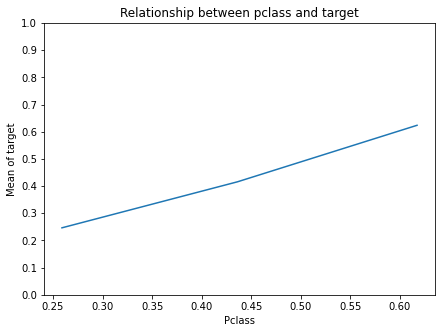

In [12]:
''' The MeanEncoder has the characteristic that return monotonic
 variables, that is, encoded variables which values increase as the target increases'''

# let's explore the monotonic relationship
plt.figure(figsize=(7,5))
pd.concat([test_t,y_test], axis=1).groupby("pclass")["survived"].mean().plot()
#plt.xticks([0,1,2])
plt.yticks(np.arange(0,1.1,0.1))
plt.title("Relationship between pclass and target")
plt.xlabel("Pclass")
plt.ylabel("Mean of target")
plt.show()

### Automatically select the variables

This encoder will select all categorical variables to encode, when no variables are specified when calling the encoder.

In [11]:
mean_enc = MeanEncoder()

mean_enc.fit(X_train, y_train)

MeanEncoder(variables=['pclass', 'sex', 'cabin', 'embarked'])

In [12]:
mean_enc.variables

['pclass', 'sex', 'cabin', 'embarked']

In [13]:
# we can see the transformed variables in the head view

train_t = mean_enc.transform(X_train)
test_t = mean_enc.transform(X_test)

test_t.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
1139,0.259036,0.187608,38.0,0,0,7.8958,0.304843,0.338957
533,0.436170,0.728358,21.0,0,1,21.0000,0.304843,0.338957
459,0.436170,0.187608,42.0,1,0,27.0000,0.304843,0.338957
1150,0.259036,0.187608,NaN,0,0,14.5000,0.304843,0.338957
393,0.436170,0.187608,25.0,0,0,31.5000,0.304843,0.338957
